# Assignment 1

We have provided you with a dataset `data/ab_test_data.csv`. Assume it to be an extremely simplified version of an A/B testing in which we have
- `user_id`
- `variant`: whether we used campaign $A$ or campaign $B$ 
- `converted`: whether the user bought our insurance or not


In [37]:
import numpy as np
import pandas as pd
import math
from scipy import stats
from scipy.stats import binom, norm, poisson, uniform
from statsmodels.stats.proportion import proportions_ztest

## Basic Exploratory Data Analysis (EDA):
1. Calculate the policy purchase rate for both Variant A and Variant B.
2. Visualize the distribution of policy purchases for both variants using a bar graph.


In [3]:
ab_test_df = pd.read_csv('data/ab_test_data.csv')
ab_test_df

,user_id,variant,converted
0,6b6a1128-19dd-4704-a8a9-cc5b986855fb,A,0
1,00117557-8a91-43e7-ab35-8fba5a0fa6de,B,0
2,ce20b863-e5c0-461c-8ac7-c11292c5d2c1,A,0
3,88bcd227-53e7-4485-bc0a-05481cee5b82,A,0
4,ea7e5791-251b-440d-8adb-381c42233166,A,0
...,...,...,...
9995,58a20099-f951-4482-a12e-47d2157dc305,B,0
9996,0742d6b6-b622-40dd-bfad-c1d72490c087,A,0
9997,8d664625-ea27-4854-9547-1f1885d58f04,B,1
9998,85317eb1-34e9-4a73-ae98-b738434443b7,B,0


The policy purchase rate 
variant
A    0.050070
B    0.059755
Name: converted, dtype: float64


<Axes: xlabel='variant'>

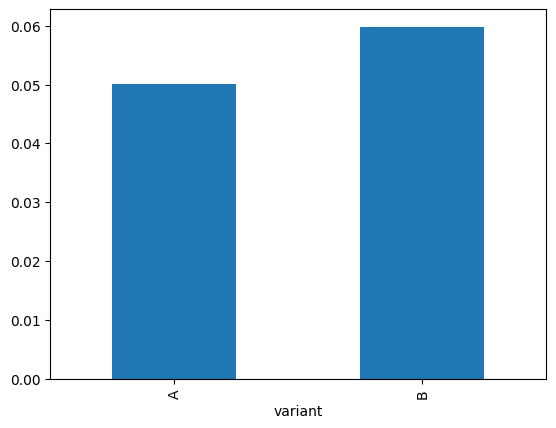

In [34]:
rate_by_variant = ab_test_df.groupby('variant')['converted'].mean()
print(f"The policy purchase rate \n{rate_by_variant}")

rate_by_variant.plot(kind='bar')

## Hypothesis Formulation:
3. State the null hypothesis and alternative hypothesis.
4. Decide on a significance level ($\alpha$).

In [57]:
# H0: probability of purchase is the same for both variants     
# H1: probability of purchase is different for both variants

alpha = 0.05

## Statistical Test:
5. Choose an appropriate statistical test for this A/B test (e.g., two-proportions z-test).
6. Perform the test using Python and state the resulting p-value.


In [55]:
purchase_sum = ab_test_df.groupby('variant')['converted'].sum()
purchase_count = ab_test_df.groupby('variant')['converted'].count()

z_stat, p_value = proportions_ztest(purchase_sum, purchase_count, alternative='two-sided')
print(f"z-statistic: {z_stat:.4f}, p-value: {p_value:.4f}")


z-statistic: -2.1260, p-value: 0.0335


## Evaluation:
7. Based on the p-value, decide whether to reject the null hypothesis.
8. Discuss Type I and Type II errors in the context of your decision. What would be the implications of each error type for the insurance company?

In [58]:
if p_value < alpha:
    print("Reject H0 → Conversion rates differ significantly.")
else:
    print("Fail to reject H0 → No significant difference.")


Reject H0 → Conversion rates differ significantly.


### Implications of each error type for the insurance company:

#### Reject H0: Type I Error (False Positive) (alpha - Significance level)
**What it means:** Rejecting H0 when it's actually true - concluding that campaign B is better when there's no real difference.

**Implications:**
- Insurance company switches to campaign B thinking it's more effective
- Company invests resources (time, money, marketing budget) into campaign B
- Campaign B is not actually better, so the company wastes resources
- Company misses the opportunity to optimize further or test other variants
- **Cost:** Wasted marketing budget, opportunity cost, potential customer confusion from switching campaigns

#### Fail to reject H0: Type II Error (False Negative) (beta - Power of the test)
**What it means:** Failing to reject H0 when it's actually false - concluding there's no difference when campaign B is actually better.

**Implications:**
- Insurance company keeps using campaign A (or doesn't switch to B)
- Company misses out on the higher conversion rate that campaign B would provide
- Lower revenue and fewer policy purchases than could be achieved
- Company continues with a suboptimal campaign
- **Cost:** Lost revenue, missed growth opportunities, lower customer acquisition

